<a href="https://colab.research.google.com/github/rachit-shah/Apparent-Age-Prediction-using-CNN/blob/master/Number_of_Events_Per_Timestamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from datetime import datetime, timedelta
sns.set(style="whitegrid")
import matplotlib
import time
import os
#os.chdir('visualizations/1')


In [0]:
#Load ALL csv files to process compressed in one zip file named csv.zip and upload
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
!unzip csv.zip -d csv

Saving csv.zip to csv.zip
User uploaded file "csv.zip" with length 16769362 bytes


In [0]:
#Connect your Google Drive by clicking on the generated link, signing in and copying the generated secret here
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Read data into dataframe

#Change filename according to the csv file you want to process
filename = 'SJN-Ant_Pre_100%_6Workers'

df = pd.read_csv('csv/'+filename+'.csv')
df['FPC'] = df['FPC'].map(lambda x: round(x,2))
df2 = df[['FPC','Total Events','m1 events','m2 events','part events','tool events']]
df = df.drop(['FPC','Total Events','m1 events','m2 events','part events','tool events'],axis=1)
#df = df[(df.T != 0).any()]

In [0]:
#Change number of frames to process (96000 frames = 960 mins, 100 frames = 1 min)
n = 96000 #frames 
x = df.columns

In [0]:
#Calculate timestamp from given frame number
def timestamp(frame_number):
    secs = int((frame_number/100)*60)
    sec = timedelta(seconds=int(secs))
    d = datetime(1,1,1) + sec
    return "%dD : %dH : %dM : %dS" % (d.day-1, d.hour, d.minute, d.second)

#Helper methods for matplotlib animation
def init():
    return rs

def animate(i):
    global rs,fpc_text,df2,df,event_text,m1_text,m2_text,part_text,tool_text
    y = df.iloc[i]
    z = list(df2.iloc[i])
    heights=list(y)
    framenum = y.name
    for h,r in zip(heights,rs):
        r.set_height(h)
    #time_text.set_text(timestamp(framenum))
    fpc_text.set_text('FPC:'+str(z[0]))
    event_text.set_text('Events:'+str(int(z[1])))
    m1_text.set_text(int(z[2]))
    m2_text.set_text(int(z[3]))
    part_text.set_text(int(z[4]))
    tool_text.set_text(int(z[5]))
    #fpc_text.set_text('Event Count: '+str(z[1])+", Frac. Parts Comp.: "+str(z[0]))
    return rs

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


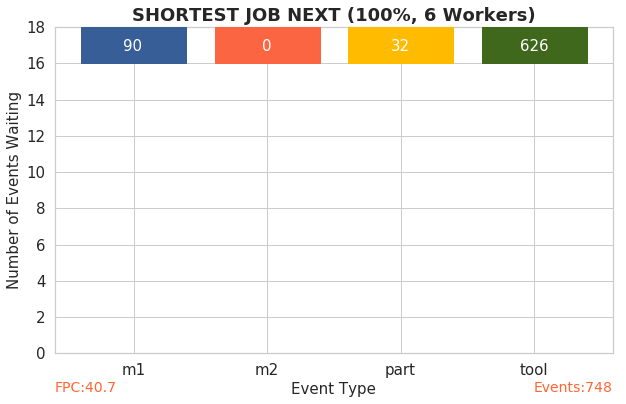

Time taken:  14546068


In [0]:
#Generate video using matplotlib animation

stmillis = int(round(time.time() * 1000))
fig = plt.figure(figsize=(10,6))
plt.ylim(0, 18)
plt.xlabel('Event Type',fontsize=15)
plt.ylabel('Number of Events Waiting',fontsize=15)

policy = filename.split("_")[0]
if "FIFO" in policy:
  title = "FIRST IN - FIRST OUT"
elif "SJN" in policy:
  title = "SHORTEST JOB NEXT"
elif "LJN" in policy:
  title = "LONGEST JOB NEXT"
elif "HRR" in policy:
  title = "HIGHEST RESPONSE RATIO NEXT"

if "Ant" in policy:
  type_ant = filename.split("_")[1]
  if type_ant == "FF":
    title += "FORWARD FILL"
  else:
    title += "PREEMPTIVE"
  
    
plt.title(title+" (100%, 6 Workers)",fontsize=18, fontweight = "bold")
barcollection = plt.bar(x,df.iloc[33436],color=['#375E97','#FB6542','#FFBB00','#3F681C'])
ax = plt.axes()
#time_text = ax.text(0.92, 1.053,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,fontsize=15)
#time_text = ax.text(0.9, 1.053,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,fontsize=15)
fpc_text = ax.text(0, -0.085,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,fontsize=14,color="#ff6633")
event_text = ax.text(1, -0.085,'',horizontalalignment='right',verticalalignment='top', transform=ax.transAxes,fontsize=14,color="#ff6633")

#time_text.set_text(timestamp(33436))
fpc_text.set_text('FPC: 527.26')
event_text.set_text('Events: 10000')

rect1 = matplotlib.patches.Rectangle((-0.395,16), 0.785, 2, color='#375E97',zorder=3)
rect2 = matplotlib.patches.Rectangle((0.61,16), 0.785, 2, color='#FB6542',zorder=3)
rect3 = matplotlib.patches.Rectangle((1.605,16), 0.785, 2, color='#FFBB00',zorder=3)
rect4 = matplotlib.patches.Rectangle((2.61,16), 0.785, 2, color='#3F681C',zorder=3)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=13)

m1_text = ax.text(0.14, 0.965,'0',horizontalalignment='center',verticalalignment='top',color="white", transform=ax.transAxes,fontsize=15)
m2_text = ax.text(0.38, 0.965,'0',horizontalalignment='center',verticalalignment='top',color="white", transform=ax.transAxes,fontsize=15)
part_text = ax.text(0.62, 0.965,'0',horizontalalignment='center',verticalalignment='top',color="white", transform=ax.transAxes,fontsize=15)
tool_text = ax.text(0.86, 0.965,'0',horizontalalignment='center',verticalalignment='top',color="white", transform=ax.transAxes,fontsize=15)


#title_text = ax.text(-0.07, 0.5,'Number of Events per Timestamp ('+filename+')',horizontalalignment='right',verticalalignment='center',rotation="vertical",transform=ax.transAxes,fontsize=12)


rs = [r for r in barcollection]

anim=animation.FuncAnimation(fig,animate,init_func=init,repeat=False,blit=True,frames=n,
                             interval=1)
anim.save(filename+'.mp4',writer=animation.FFMpegWriter(fps=24,bitrate=1800),dpi=200)
plt.show()
endmillis = int(round(time.time() * 1000))
print("Time taken: ", endmillis - stmillis)


In [0]:
#Copy generated video to google drive
path = filename + '.mp4'
!cp "$path" gdrive/My\ Drive/.